In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
all_data = pd.read_csv("spotify-2023.csv", encoding='ISO-8859-1')
all_data2 = pd.read_csv("spotify-2023.csv", encoding='ISO-8859-1')

In [17]:
all_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Data Overview

In [18]:
columns, rows = all_data.shape
print(f'There are {columns} Columns and {rows} Rows')

all_data.info()


There are 953 Columns and 24 Rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key   

In [19]:
missing_values = all_data.isnull().sum()
missing_values

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [99]:
# Drop missing val in key
all_data = all_data.dropna(subset=['key'])
# Replace Null values to 0 in in_shazam_charts
all_data['in_shazam_charts'].fillna(0, inplace=True)
# Convert to numeric datatype
all_data['streams'] = pd.to_numeric(all_data['streams'], errors='coerce')
all_data = all_data.dropna(subset=['streams'])


In [21]:
# Drop missing val in key
all_data = all_data.dropna(subset=['key'])
# Replace Null values to 0 in in_shazam_charts
all_data['in_shazam_charts'].fillna(0, inplace=True)
# Convert to numeric datatype
all_data['streams'] = pd.to_numeric(all_data['streams'], errors='coerce')
all_data = all_data2.dropna(subset=['streams'])

### Basic Descriptive Statistics 

In [22]:
all_data_mean = all_data['streams'].mean()
all_data_median = all_data['streams'].median()
all_data_standard_dev = all_data['streams'].std()

print(f'Mean                : {all_data_mean}')
print(f'Median              : {all_data_median}')
print(f'Standard Deviation  : {all_data_standard_dev}')



Mean                : 513355357.38856477
Median              : 284908316.0
Standard Deviation  : 571485476.7292064


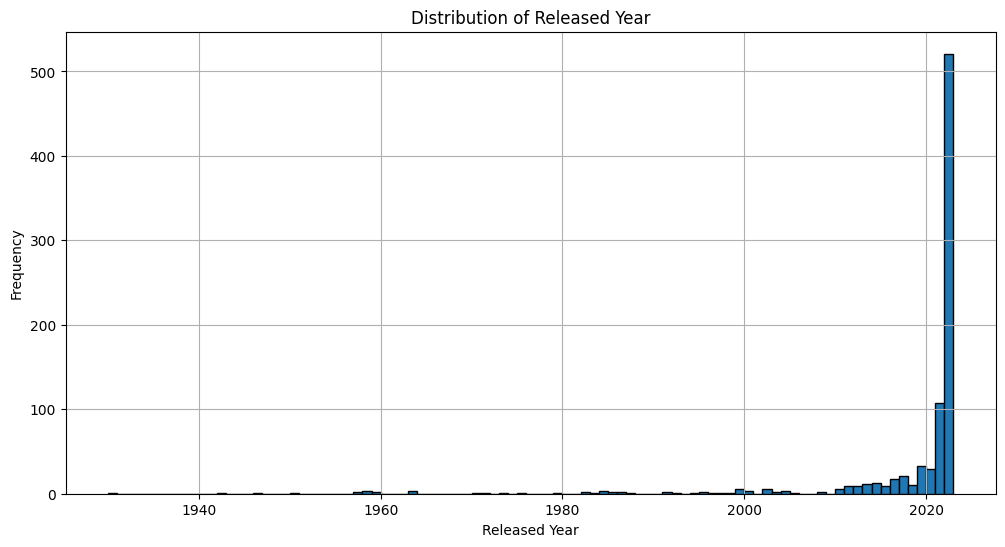

In [23]:
# Plot histogram for released_year
plt.figure(figsize=(12, 6))

all_data['released_year'].hist(bins=range(all_data['released_year'].min(), all_data['released_year'].max() + 1), edgecolor='black')
plt.title('Distribution of Released Year')
plt.xlabel('Released Year')
plt.ylabel('Frequency')
plt.show()

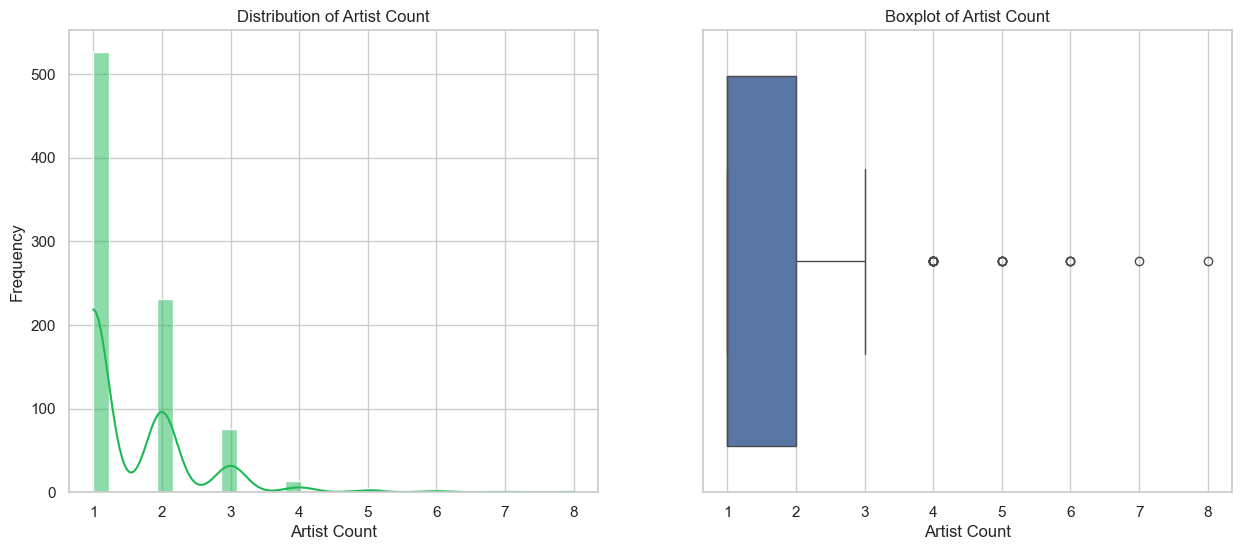

In [110]:
# Convert the 'streams' column to numeric, forcing errors to NaN (if any)
all_data['streams'] = pd.to_numeric(all_data['streams'], errors='coerce')

# Create subplots for artist_count and released_year distributions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Histogram for artist_count
sns.histplot(all_data['artist_count'], bins=30, kde=True, ax=axes[0], palette='deep')
axes[0].set_title('Distribution of Artist Count')
axes[0].set_xlabel('Artist Count')
axes[0].set_ylabel('Frequency')

# Boxplot for artist_count
sns.boxplot(x=all_data['artist_count'], ax=axes[1], palette='deep')
axes[1].set_title('Boxplot of Artist Count')
axes[1].set_xlabel('Artist Count')
plt.show()

In [34]:
# Calculate summary statistics for artist_count
summary_stats = all_data['artist_count'].describe()
min_value = summary_stats['min']
q1 = summary_stats['25%']
median = summary_stats['50%']
q3 = summary_stats['75%']
max_value = summary_stats['max']

# Calculate the IQR (Interquartile Range)
iqr = q3 - q1

# Define outlier boundaries
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify non-outlier values
non_outliers = all_data[(all_data['artist_count'] >= lower_bound) & (all_data['artist_count'] <= upper_bound)]

# Calculate the new max excluding outliers
max_value_non_outliers = non_outliers['artist_count'].max()

# Identify outliers
outliers = all_data[(all_data['artist_count'] < lower_bound) | (all_data['artist_count'] > upper_bound)]

# Print the results
print(f"Minimum: {min_value}")
print(f"Maximum: {max_value}")
print(f"Maximum (excluding outliers): {max_value_non_outliers}")
print(f"Q1: {q1}")
print(f"Median (Q2): {median}")
print(f"Q3: {q3}")
print(f"Outliers:\n{outliers[['track_name', 'artist_count']]}")

Minimum: 1.0
Maximum: 8.0
Maximum (excluding outliers): 3
Q1: 1.0
Median (Q2): 1.0
Q3: 2.0
Outliers:
                                            track_name  artist_count
137        Tere Vaaste (From "Zara Hatke Zara Bachke")             5
141                                      Novo Balanï¿½             4
197                                    POLARIS - Remix             4
200  Annihilate (Spider-Man: Across the Spider-Vers...             4
201  Angel Pt 1 (feat. Jimin of BTS, JVKE & Muni Long)             5
238  Link Up (Metro Boomin & Don Toliver, Wizkid fe...             5
328                                   Marisola - Remix             5
365  Enemy (with JID) - from the series Arcane Leag...             4
393                                  Jhoome Jo Pathaan             6
402                     Besharam Rang (From "Pathaan")             6
457                           Happy Xmas (War Is Over)             4
488                                    Tubarï¿½ï¿½o Te             4
54

### Top Performers

                                        track_name         artist(s)_name  \
55                                 Blinding Lights             The Weeknd   
179                                   Shape of You             Ed Sheeran   
86                               Someone You Loved          Lewis Capaldi   
620                                   Dance Monkey            Tones and I   
41   Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee   

          streams  
55   3.703895e+09  
179  3.562544e+09  
86   2.887242e+09  
620  2.864792e+09  
41   2.808097e+09  


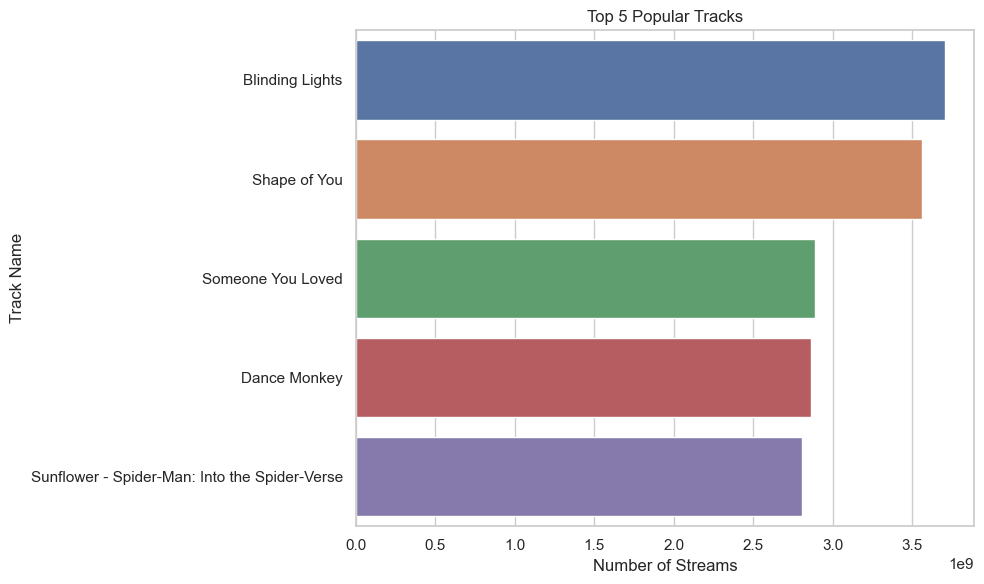

In [100]:
# Get the top 5 most streamed tracks
top_streamed_tracks = all_data.nlargest(5, 'streams')[['track_name','artist(s)_name','streams']]
print(top_streamed_tracks)

plt.figure(figsize=(10, 6))
sns.barplot(x='streams', y='track_name', data=top_streamed_tracks.head(5), palette='deep')
plt.title('Top 5 Popular Tracks')
plt.xlabel('Number of Streams')
plt.ylabel('Track Name')
plt.tight_layout()
plt.show()


artist(s)_name
Taylor Swift    29
The Weeknd      17
SZA             17
Bad Bunny       16
Harry Styles    13
Name: count, dtype: int64


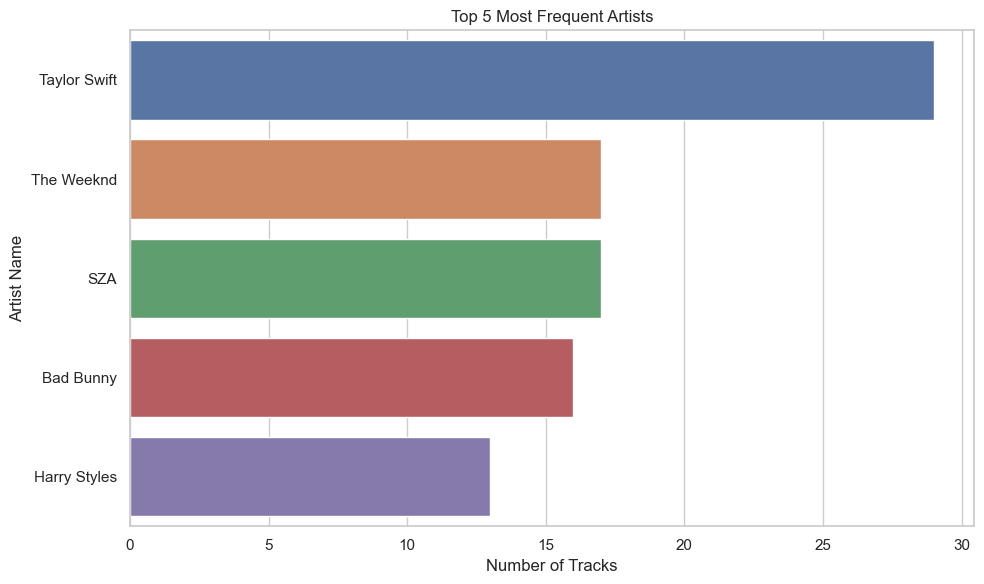

In [101]:
top_artists = all_data['artist(s)_name'].value_counts().head(5)
print(top_artists)

# Sort the DataFrame by the 'streams' column in descending order
top_streamed_tracks = all_data.sort_values(by='streams', ascending=False)

# Get the top 5 most streamed tracks
top_5_tracks = top_streamed_tracks.head(5)

# top 5 most frequent artists
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='deep')
plt.title('Top 5 Most Frequent Artists')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist Name')
plt.tight_layout()
plt.show()

### Temporal Trends


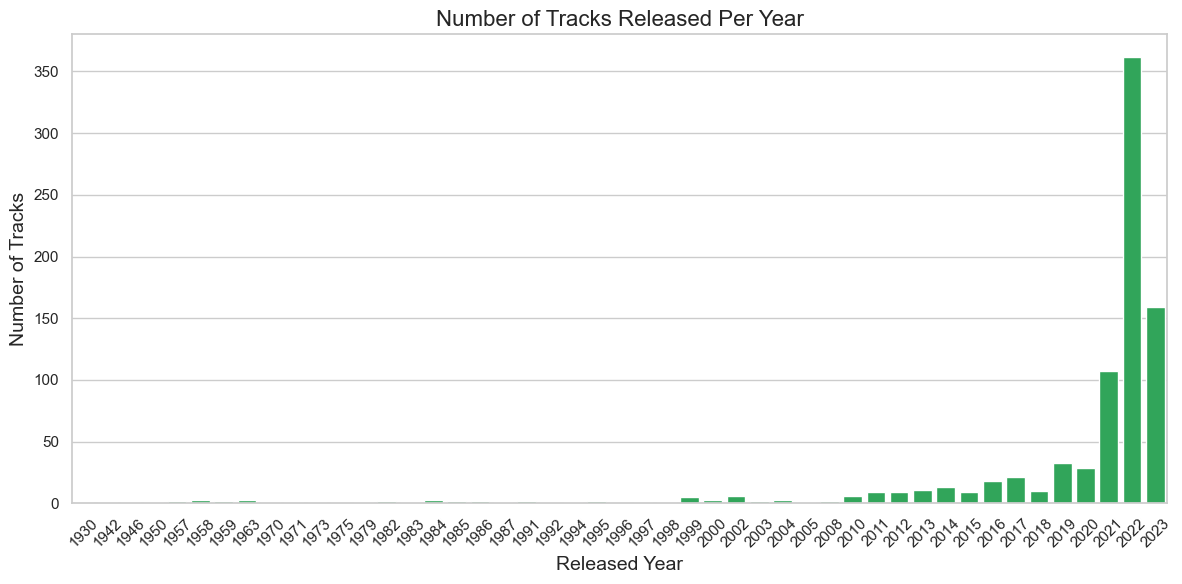

In [51]:
# Group by released year and count the number of tracks
tracks_per_year = all_data.groupby('released_year').size()

# Convert the Series to a DataFrame for better plotting
tracks_per_year_df = tracks_per_year.reset_index(name='track_count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='released_year', y='track_count', data=tracks_per_year_df) 

# Adding titles and labels
plt.title('Number of Tracks Released Per Year', fontsize=16)
plt.xlabel('Released Year', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

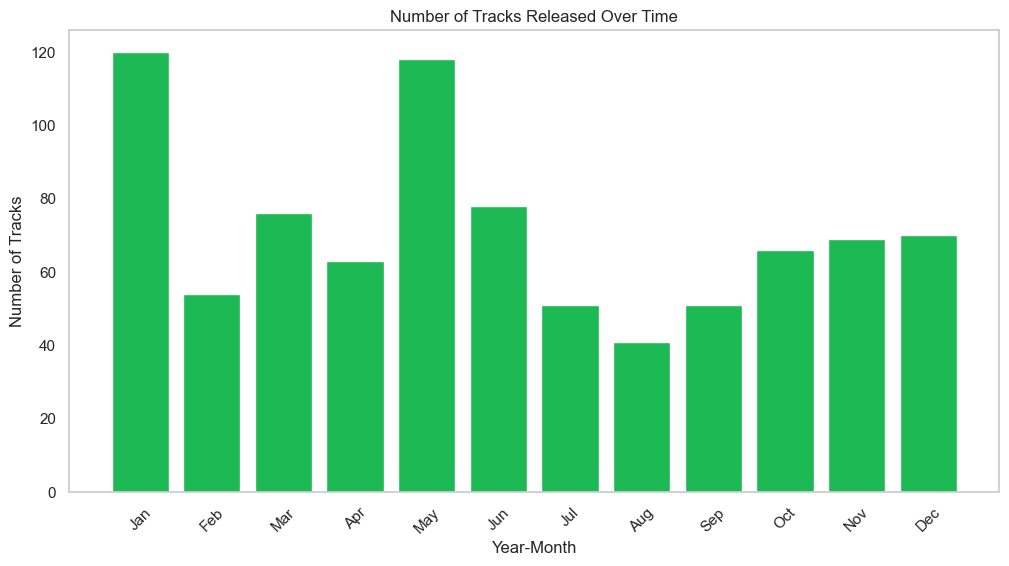

In [52]:
tracks_per_month = all_data.groupby('released_month').size()

# Step 3: Plot the data
plt.figure(figsize=(12, 6))
plt.bar(tracks_per_month.index, tracks_per_month.values)
plt.title('Number of Tracks Released Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tracks')
plt.xticks(ticks=tracks_per_month.index, 
           labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
           rotation=45) 

plt.grid()
plt.show()

In [53]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

all_data['streams'] = scaler.fit_transform(all_data[['streams']])
print(all_data.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts   streams  in_apple_playlists  ...  bpm key   mode  \
0                147  0.038170                 

                 streams       bpm  valence_%  danceability_%  energy_%
streams         1.000000 -0.002163  -0.042787       -0.100702 -0.029714
bpm            -0.002163  1.000000   0.027436       -0.161907  0.016068
valence_%      -0.042787  0.027436   1.000000        0.397807  0.346820
danceability_% -0.100702 -0.161907   0.397807        1.000000  0.166331
energy_%       -0.029714  0.016068   0.346820        0.166331  1.000000


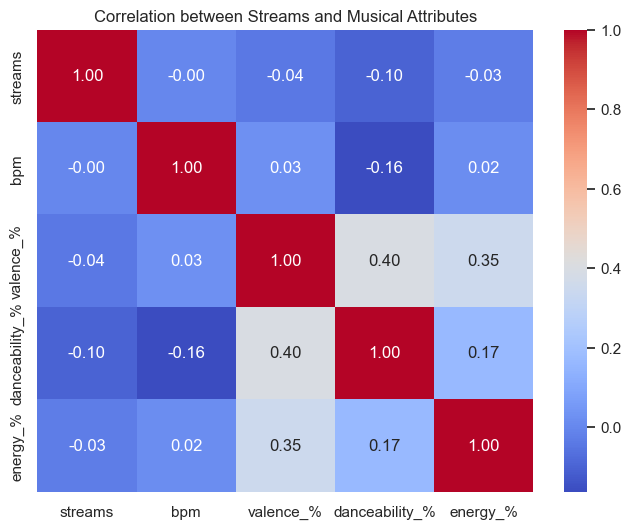

In [58]:
# Calculate the correlation matrix
correlation_matrix = all_data[['streams', 'bpm','valence_%', 'danceability_%', 'energy_%']].corr()

# Display the correlation matrix
print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Streams and Musical Attributes')
plt.show()



In [61]:
# Correlation between danceability and energy
dance_energy_corr = all_data[['danceability_%', 'energy_%']].corr().iloc[0, 1]
print(f"Correlation between danceability and energy: {dance_energy_corr:.2f}")

# Correlation between valence and acousticness
valence_acoustic_corr = all_data[['valence_%', 'acousticness_%']].corr().iloc[0, 1]
print(f"Correlation between valence and acousticness: {valence_acoustic_corr:.2f}")


Correlation between danceability and energy: 0.17
Correlation between valence and acousticness: -0.07


### Platform Popularity 

Spotify Playlists: 4460683 tracks
Spotify Charts: 10249 tracks
Apple Playlists: 57748 tracks


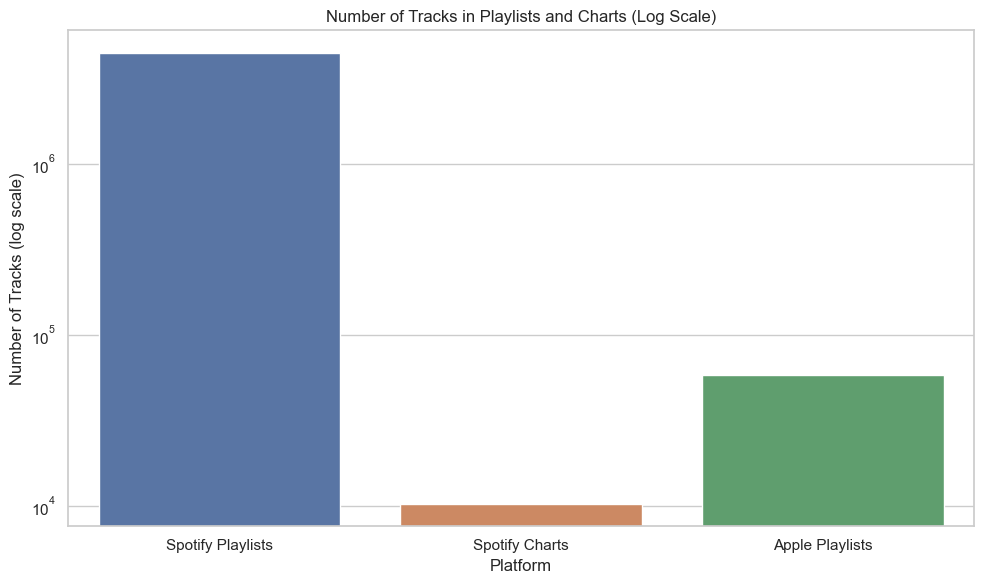

In [65]:
# Sum the number of tracks for the selected platforms
track_counts = {
    'Spotify Playlists': all_data['in_spotify_playlists'].sum(),
    'Spotify Charts': all_data['in_spotify_charts'].sum(),
    'Apple Playlists': all_data['in_apple_playlists'].sum()
}

# Print out the values
for platform, count in track_counts.items():
    print(f"{platform}: {count} tracks")

# Create a DataFrame for plotting
track_counts_df = pd.DataFrame(track_counts.values(), index=track_counts.keys(), columns=['Number of Tracks'])

# Create a bar plot with a log scale for better visibility
plt.figure(figsize=(10, 6))
sns.barplot(x=track_counts_df.index, y='Number of Tracks', data=track_counts_df, palette='deep')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Number of Tracks in Playlists and Charts (Log Scale)')
plt.xlabel('Platform')
plt.ylabel('Number of Tracks (log scale)')
plt.tight_layout()
plt.show()

In [71]:
# Ensure 'streams' is treated as a string
all_data['streams'] = all_data['streams'].astype(str)

# Remove rows with invalid stream data
all_data_cleaned = all_data[all_data['streams'].str.replace(',', '').str.isnumeric()]

# Convert the streams column to float after removing bad rows
all_data_cleaned['streams'] = all_data_cleaned['streams'].str.replace(',', '').astype(float)

# Verify the conversion
print(all_data_cleaned['streams'].dtype)

# Identify rows where the streams column contains non-numeric values
invalid_rows = all_data[~all_data['streams'].str.replace(',', '').str.isnumeric()]
print(invalid_rows[['track_name', 'streams']])

# Clean and convert the streams column to float again (this part is redundant since you already did it above)
# all_data_cleaned['streams'] = all_data_cleaned['streams'].str.replace(',', '').astype(float)

# Verify the conversion
print(all_data_cleaned['streams'].dtype)
print(all_data_cleaned['streams'].head())


float64
                              track_name               streams
0    Seven (feat. Latto) (Explicit Ver.)  0.038170370272903334
1                                   LALA   0.03610081307353085
2                                vampire  0.037798402385085327
3                           Cruel Summer   0.21621526425199158
4                         WHERE SHE GOES   0.08186889208889073
..                                   ...                   ...
948                         My Mind & Me   0.02469580465491676
949            Bigger Than The Whole Sky   0.03290298360056641
950                 A Veces (feat. Feid)  0.019846937979767054
951                        En La De Ella  0.036149228628005535
952                                Alone   0.02591992987727015

[857 rows x 2 columns]
float64
Series([], Name: streams, dtype: float64)


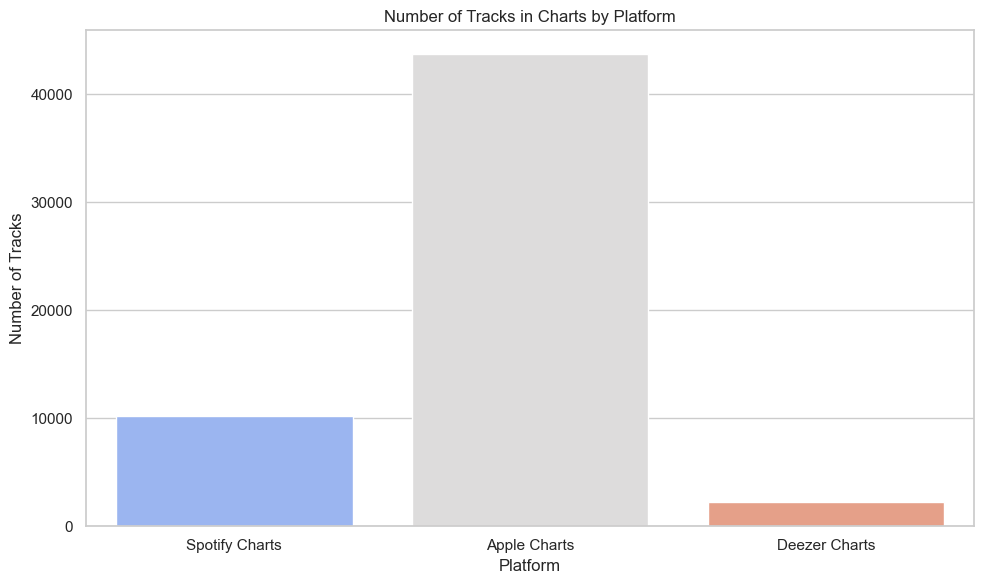

In [72]:
# Extract relevant columns for charts
charts_counts = {
    'Spotify Charts': all_data['in_spotify_charts'].sum(),
    'Apple Charts': all_data['in_apple_charts'].sum(),
    'Deezer Charts': all_data['in_deezer_charts'].sum()
}

# Create a DataFrame for easier plotting
charts_counts_df = pd.DataFrame.from_dict(charts_counts, orient='index', columns=['Number of Tracks'])

# Plot for charts
plt.figure(figsize=(10, 6))
sns.barplot(x=charts_counts_df.index, y='Number of Tracks', data=charts_counts_df, palette='coolwarm')
plt.title('Number of Tracks in Charts by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Tracks')
plt.tight_layout()
plt.show()

### Advanced Analysis

In [73]:
all_data_clean = all_data.dropna(subset=['key', 'streams'])
all_data_clean['streams'] = pd.to_numeric(all_data_clean['streams'], errors='coerce')


In [74]:
avg_streams_by_key = all_data_clean.groupby('key')['streams'].mean().reset_index()


In [75]:
# Example mapping (adjust based on your data)
def classify_mode(key):
    if key in ['C', 'D', 'E', 'F', 'G', 'A', 'B']:  # Assuming these are Major keys
        return 'Major'
    else:
        return 'Minor'  # Assuming the rest are Minor

avg_streams_by_key['Mode'] = avg_streams_by_key['key'].apply(classify_mode)


In [76]:
avg_streams_by_mode = avg_streams_by_key.groupby('Mode')['streams'].mean().reset_index()


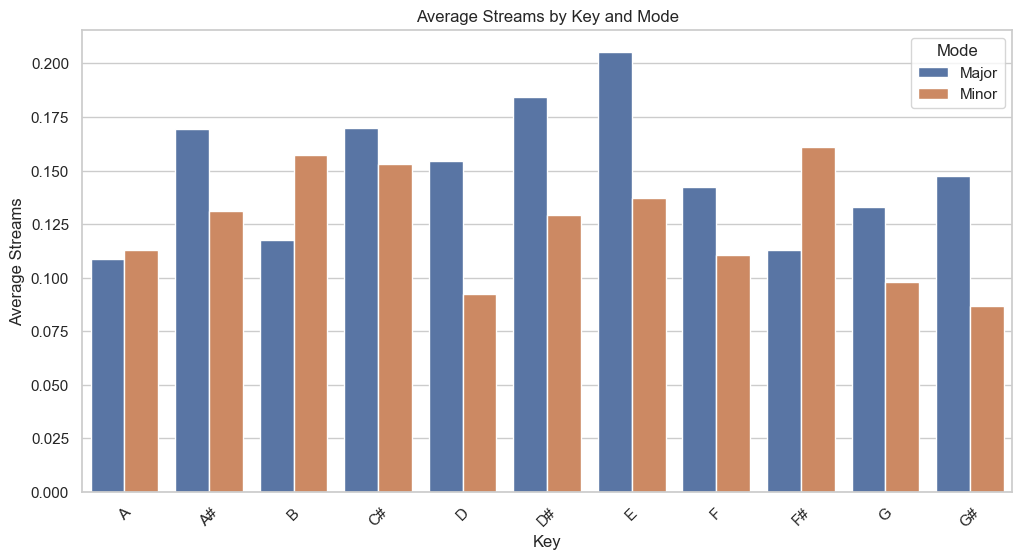

In [79]:
# Ensure that the 'streams' column is numeric
all_data['streams'] = pd.to_numeric(all_data['streams'], errors='coerce')

# Group by 'key' and 'mode', calculating the mean streams
key_mode_analysis = all_data.groupby(['key', 'mode'])['streams'].mean().reset_index()

# Visualizing the average streams for each key-mode combination
plt.figure(figsize=(12, 6))
sns.barplot(data=key_mode_analysis, x='key', y='streams', hue='mode', palette='deep')
plt.title('Average Streams by Key and Mode')
plt.xlabel('Key')
plt.ylabel('Average Streams')
plt.xticks(rotation=45)
plt.legend(title='Mode')
plt.show()

Do certain genres or artists consistently appear in more playlists or charts? Perform an 
analysis to compare the most frequently appearing artists in playlists or charts. 

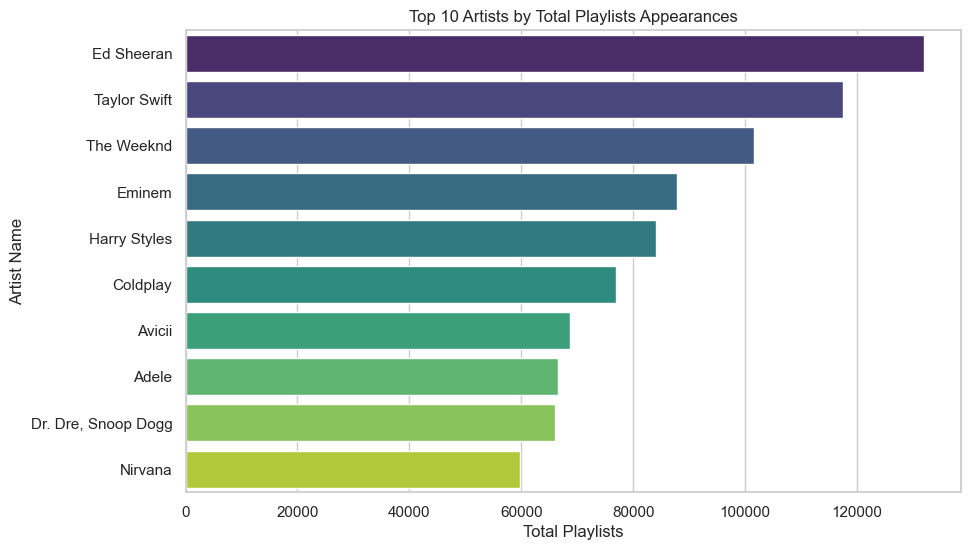

In [86]:
# Ensure relevant columns are numeric
all_data['in_spotify_playlists'] = pd.to_numeric(all_data['in_spotify_playlists'], errors='coerce').fillna(0)
all_data['in_apple_playlists'] = pd.to_numeric(all_data['in_apple_playlists'], errors='coerce').fillna(0)
all_data['in_deezer_playlists'] = pd.to_numeric(all_data['in_deezer_playlists'], errors='coerce').fillna(0)

# Group by artist name and count occurrences in playlists
artist_playlists_counts = all_data.groupby('artist(s)_name')[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum().reset_index()

# Add up counts across all playlists
artist_playlists_counts['Total Playlists'] = artist_playlists_counts[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum(axis=1)

# Sort to find the top artists by appearances
top_artists_playlists = artist_playlists_counts.sort_values(by='Total Playlists', ascending=False).head(10)

# Visualizing the top artists
plt.figure(figsize=(10, 6))
sns.barplot(data=top_artists_playlists, x='Total Playlists', y='artist(s)_name', palette='viridis')
plt.title('Top 10 Artists by Total Playlists Appearances')
plt.xlabel('Total Playlists')
plt.ylabel('Artist Name')
plt.show()


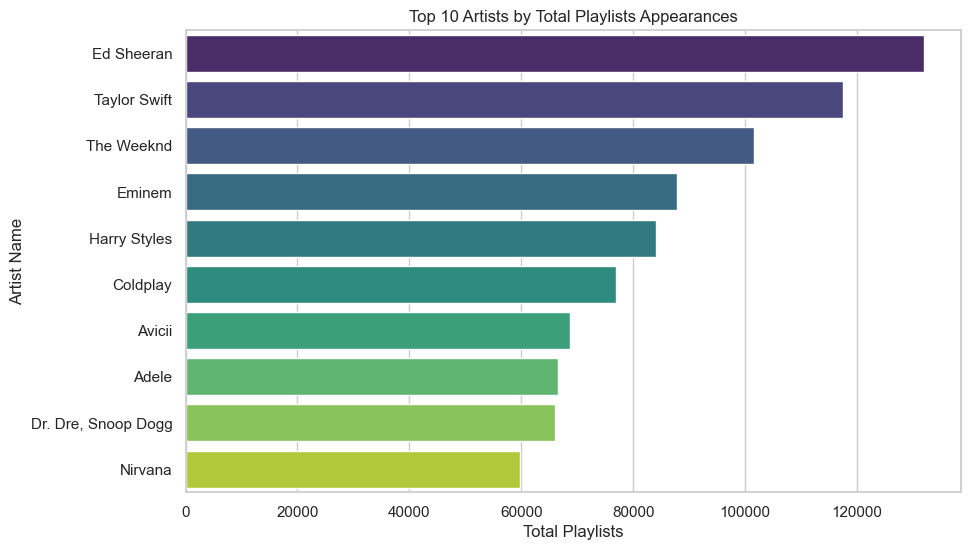

In [90]:
# Ensure the playlist columns are numeric
all_data['in_spotify_playlists'] = pd.to_numeric(all_data['in_spotify_playlists'], errors='coerce')
all_data['in_apple_playlists'] = pd.to_numeric(all_data['in_apple_playlists'], errors='coerce')
all_data['in_deezer_playlists'] = pd.to_numeric(all_data['in_deezer_playlists'], errors='coerce')

# Group by artist name and sum their appearances in playlists
artist_playlists_counts = all_data.groupby('artist(s)_name')[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum().reset_index()

# Add up counts across all playlists
artist_playlists_counts['Total Playlists'] = artist_playlists_counts[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum(axis=1)

# Sort to find the top artists by appearances
top_artists_playlists = artist_playlists_counts.sort_values(by='Total Playlists', ascending=False).head(10)

# Visualizing the top artists in playlists
plt.figure(figsize=(10, 6))
sns.barplot(data=top_artists_playlists, x='Total Playlists', y='artist(s)_name', palette='viridis')
plt.title('Top 10 Artists by Total Playlists Appearances')
plt.xlabel('Total Playlists')
plt.ylabel('Artist Name')
plt.show()

# Now, let's analyze their presence in charts if the relevant column exists
# Assuming a 'chart_position' or similar column exists for chart appearances
if 'chart_position' in all_data.columns:
    artist_chart_counts = all_data.groupby('artist(s)_name')['chart_position'].count().reset_index()
    artist_chart_counts.rename(columns={'chart_position': 'Total Charts'}, inplace=True)

    # Combine playlist and chart data
    combined_counts = pd.merge(artist_playlists_counts, artist_chart_counts, on='artist(s)_name', how='outer').fillna(0)

    # Visualize the combined data
    combined_counts.set_index('artist(s)_name').plot(kind='bar', figsize=(12, 6))
    plt.title('Top Artists by Playlist and Chart Appearances')
    plt.xlabel('Artist Name')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend(['Total Playlists', 'Total Charts'])
    plt.show()


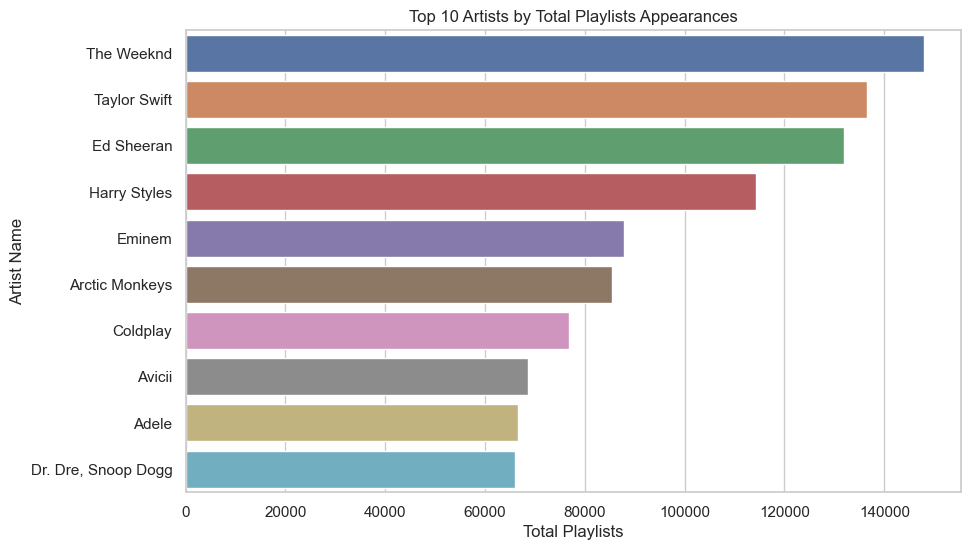

In [98]:
# Convert playlist columns to numeric, coercing errors to NaN
all_data2['in_spotify_playlists'] = pd.to_numeric(all_data2['in_spotify_playlists'], errors='coerce')
all_data2['in_apple_playlists'] = pd.to_numeric(all_data2['in_apple_playlists'], errors='coerce')
all_data2['in_deezer_playlists'] = pd.to_numeric(all_data2['in_deezer_playlists'], errors='coerce')

# Group by artist name and sum occurrences in playlists
artist_playlists_counts = all_data2.groupby('artist(s)_name')[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum().reset_index()

# Add up counts across all playlists
artist_playlists_counts['Total Playlists'] = artist_playlists_counts[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum(axis=1)

# Sort to find the top artists by appearances
top_artists_playlists = artist_playlists_counts.sort_values(by='Total Playlists', ascending=False).head(10)

# Visualizing the top artists
plt.figure(figsize=(10, 6))
sns.barplot(data=top_artists_playlists, x='Total Playlists', y='artist(s)_name', palette='deep')
plt.title('Top 10 Artists by Total Playlists Appearances')
plt.xlabel('Total Playlists')
plt.ylabel('Artist Name')
plt.show()